# **1. Loading Dependencies or Packages for Mini Project**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing, metrics
import os
import scipy
from sklearn.preprocessing import MinMaxScaler
# check scikit-learn version
import sklearn


# **2. Loading Dataset from Google Drive to GoogleColabs Using Pandas**

In [60]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Specify the path to your dataset folder
dataset_path = '/content/drive/MyDrive/9961_14084_bundle_archive'

# List the files in the dataset folder
os.listdir(dataset_path)


['Train.csv', 'Test.csv']

In [62]:
# Specify the file paths for train and test datasets

train_file_path = '/content/drive/MyDrive/9961_14084_bundle_archive/Train.csv'
test_file_path = '/content/drive/MyDrive/9961_14084_bundle_archive/Test.csv'

# Load the train dataset into a Pandas DataFrame
train_df = pd.read_csv('/content/drive/MyDrive/9961_14084_bundle_archive/Train.csv')

# Load the test dataset into a Pandas DataFrame
test_df = pd.read_csv('/content/drive/MyDrive/9961_14084_bundle_archive/Test.csv')



In [63]:
# Display the first few rows of the train DataFrame

print("Train Dataset:")
print(train_df.head(3))

# Display the first few rows of the test DataFrame
print("\nTest Dataset:")
print(test_df.head(3))


Train Dataset:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   
2           FDN15        17.50          Low Fat         0.016760         Meat   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  

Test Dataset:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58      

In [64]:
# Display the shape of the train DataFrame
print("Train Dataset Shape:")
print(train_df.shape)

# Display the shape of the test DataFrame
print("\nTest Dataset Shape:")
print(test_df.shape)


Train Dataset Shape:
(8523, 12)

Test Dataset Shape:
(5681, 11)


# **3. Data Exploration in Python using NumPy, Matplotlib and Pandas**

In [67]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [68]:
print(train_df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [69]:
print(train_df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [70]:
# 'Item_Weight': 1463 missing values and 'Outlet_Size': 2410 missing values.
#  Let's impute missing values in 'Item_Weight' with the mean (Because of continuous variable (numerical)) &  mode imputation is suitable for handling missing values in categorical columns (Outlet_Size).

train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(), inplace=True)
train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0], inplace=True)
print(train_df.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [71]:
duplicate = train_df.duplicated()
print(duplicate.sum())

0


# **4. Univariate Analysis**

In [72]:
# Categorical values store in Object & Continous variables store in int/float.
print(train_df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


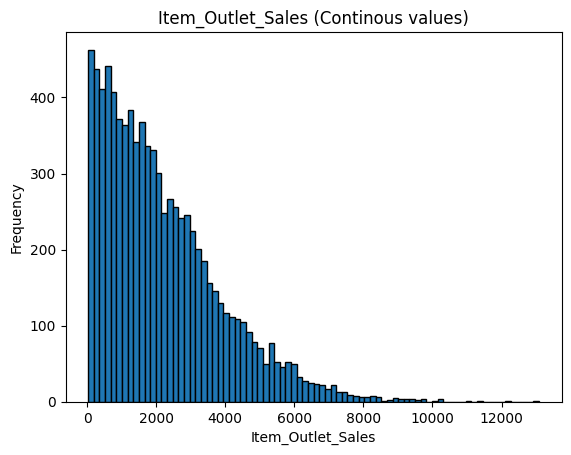

In [73]:
#Let's use Histogram using Matplotlib
plt.hist(train_df['Item_Outlet_Sales'], bins = 80, edgecolor = 'black')

# Customize the plot
plt.title('Item_Outlet_Sales (Continous values)')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')

# Show the plot
plt.show()

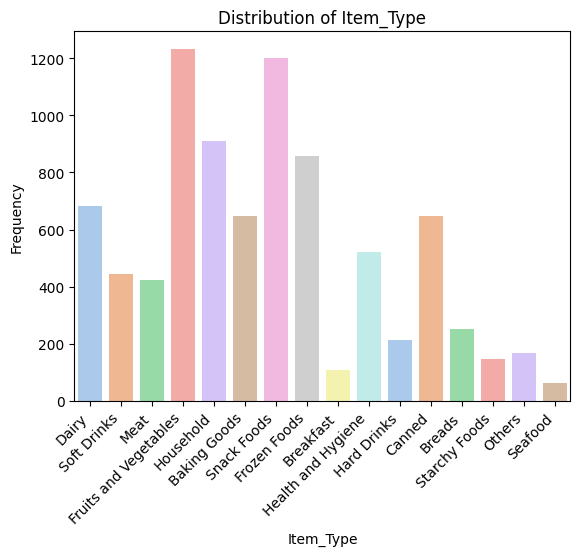

In [74]:
#Let's use Seaborn
sns.countplot(x='Item_Type', data=train_df, palette='pastel', hue='Item_Type')

# Add labels and title
plt.title('Distribution of Item_Type')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Hide the legend
plt.legend().set_visible(False)
plt.show()


# **5. Bivariate Analysis**

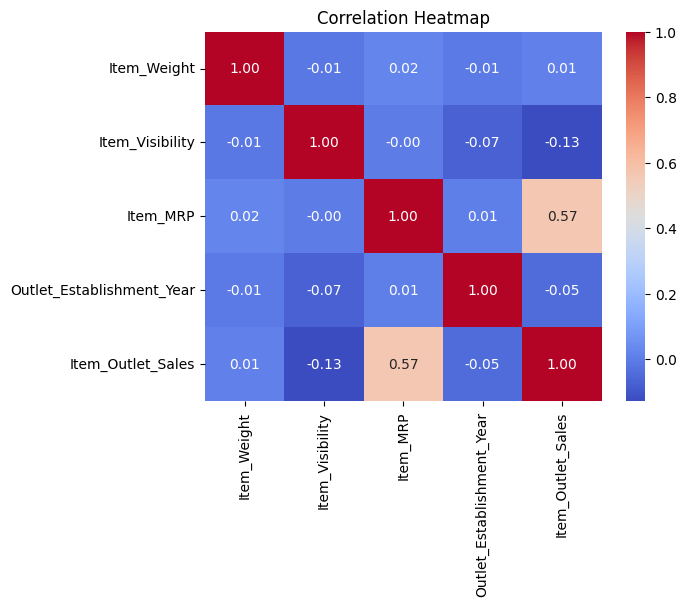

In [75]:
# Let's Calculate the correlation coefficients between numeric variables

correlation_matrix = train_df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


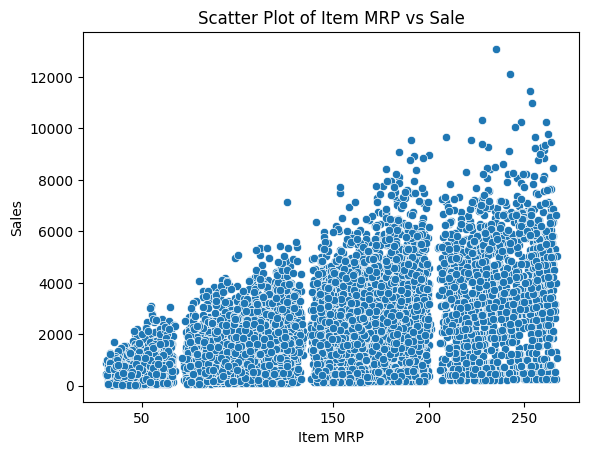

In [76]:
# Let's visualize realtionship of two variables using Scatterplot

sns.scatterplot(x ='Item_MRP', y ='Item_Outlet_Sales', data = train_df)
plt.title('Scatter Plot of Item MRP vs Sale')
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.show()

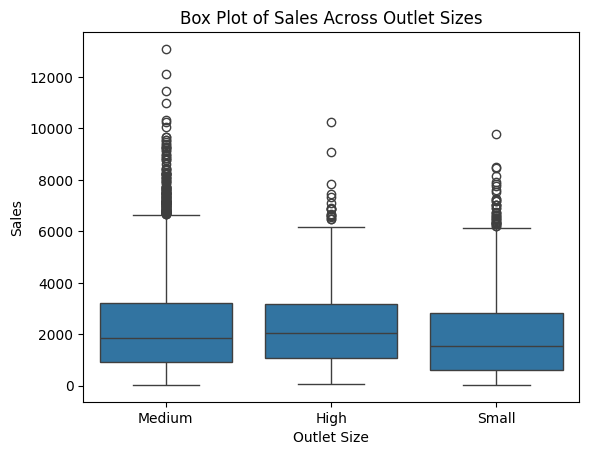

In [77]:
# Let's visualize realtionship of two variables using Boxplot

sns.boxplot(x ='Outlet_Size', y ='Item_Outlet_Sales', data=train_df)
plt.title('Box Plot of Sales Across Outlet Sizes')
plt.xlabel('Outlet Size')
plt.ylabel('Sales')
plt.show()

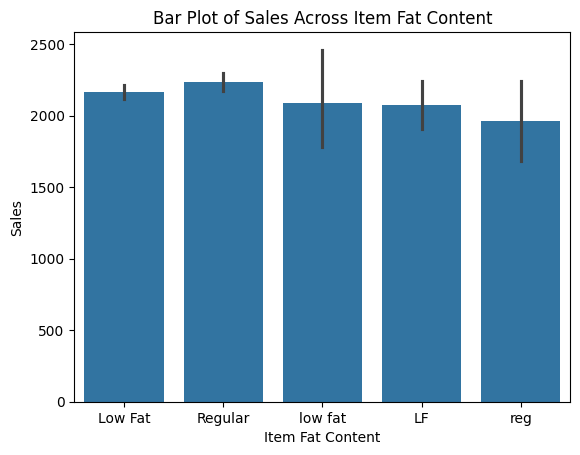

In [78]:
# Let's visualize realtionship of two variables using barplot

sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_df)
plt.title('Bar Plot of Sales Across Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Sales')
plt.show()


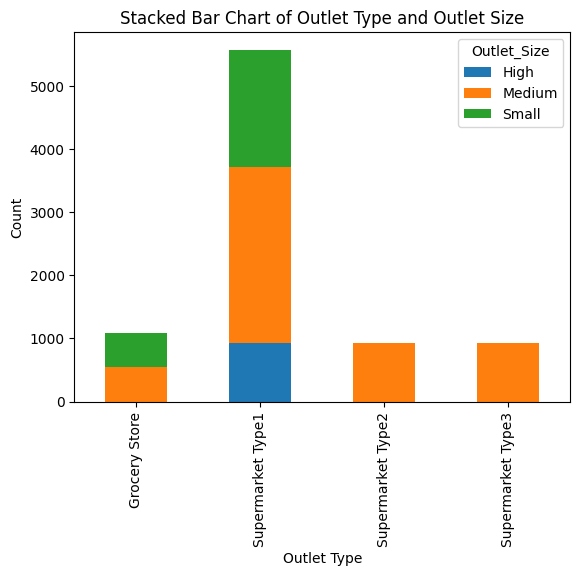

In [79]:
# Let's visualize realtionship of two variables using Crosstab

pd.crosstab(train_df['Outlet_Type'], train_df['Outlet_Size']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Outlet Type and Outlet Size')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.show()


# **6. Feature Engineering**

In [80]:
# Let's apply Label Encoding for Ordinal data (Supermarket1) - Outlet_Loaction_Tier(DataSet Column)

Outlet_Location_Type_mapping = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}

train_df['Outlet_Location_Type_encoded'] = train_df['Outlet_Location_Type'].replace(Outlet_Location_Type_mapping)
print(train_df[['Outlet_Location_Type', 'Outlet_Location_Type_encoded']].head())


  Outlet_Location_Type  Outlet_Location_Type_encoded
0               Tier 1                             1
1               Tier 3                             3
2               Tier 1                             1
3               Tier 3                             3
4               Tier 3                             3


In [81]:
print(train_df.head(5))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [82]:
# Define bins

bins = [0, 70, 140, 210, 280]
#name of groups
groups = ['Low', 'Med', 'High', 'Exp']
train_df['Item_MRP_Bin_cut'] = pd.cut(train_df['Item_MRP'], bins=bins, labels=groups)
train_df[['Item_MRP', 'Item_MRP_Bin_cut']].head()

# Count of each category
pd.DataFrame(train_df['Item_MRP_Bin_cut'].value_counts())

,Item_MRP_Bin_cut
High,3042
Med,2778
Exp,1362
Low,1341


In [83]:
# Apply() for Text Extraction:
train_df['Item_Code'] = train_df['Item_Identifier'].apply(lambda x: x[0:2])
train_df[['Item_Identifier', 'Item_Code']].head()
print(train_df.head(3))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   
2           FDN15        17.50          Low Fat         0.016760         Meat   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1          3735.1380   
1               Tier 3  Supermarket Type2           443.4228   
2               Tier 1  Supermarket Type1          2097.2700   

   Outlet_Location_Type_encoded Item_MRP_Bin_cut Item_Code  
0                             1              Exp        FD  
1      

In [84]:
# Frequency encoding using value_counts function
Item_Type_freq = train_df['Item_Type'].value_counts(normalize=True)

# Mapping the encoded values with original data
train_df['Item_Type_freq'] = train_df['Item_Type'].apply(lambda x : Item_Type_freq[x])

print('The sum of Item_Type_freq variable:', sum(Item_Type_freq))
train_df[['Item_Type', 'Item_Type_freq']].head(6)

The sum of Item_Type_freq variable: 1.0


,Item_Type,Item_Type_freq
0,Dairy,0.080019
1,Soft Drinks,0.052212
2,Meat,0.049865
3,Fruits and Vegetables,0.144550
4,Household,0.106770
5,Baking Goods,0.076030


# **7. One Hot Encoding**

In [86]:
# Specify the categorical columns you want to one-hot encode
columns_to_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Type']

# Apply one-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=columns_to_encode, drop_first=True)

# Display the first few rows of the encoded dataset
print(train_df_encoded.head())


  Item_Identifier  Item_Weight  Item_Visibility  Item_MRP Outlet_Identifier  \
0           FDA15         9.30         0.016047  249.8092            OUT049   
1           DRC01         5.92         0.019278   48.2692            OUT018   
2           FDN15        17.50         0.016760  141.6180            OUT049   
3           FDX07        19.20         0.000000  182.0950            OUT010   
4           NCD19         8.93         0.000000   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Location_Type  Item_Outlet_Sales  \
0                       1999               Tier 1          3735.1380   
1                       2009               Tier 3           443.4228   
2                       1999               Tier 1          2097.2700   
3                       1998               Tier 3           732.3800   
4                       1987               Tier 3           994.7052   

   Outlet_Location_Type_encoded Item_MRP_Bin_cut  ... Item_Type_Others  \
0                 

# **8. PreProcessing Data**

In [87]:
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Item_Identifier                  8523 non-null   object  
 1   Item_Weight                      8523 non-null   float64 
 2   Item_Visibility                  8523 non-null   float64 
 3   Item_MRP                         8523 non-null   float64 
 4   Outlet_Identifier                8523 non-null   object  
 5   Outlet_Establishment_Year        8523 non-null   int64   
 6   Outlet_Location_Type             8523 non-null   object  
 7   Item_Outlet_Sales                8523 non-null   float64 
 8   Outlet_Location_Type_encoded     8523 non-null   int64   
 9   Item_MRP_Bin_cut                 8523 non-null   category
 10  Item_Code                        8523 non-null   object  
 11  Item_Type_freq                   8523 non-null   float64 
 12  Item_F

In [88]:
train_df_encoded.isnull().sum()

Item_Identifier                    0
Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Identifier                  0
Outlet_Establishment_Year          0
Outlet_Location_Type               0
Item_Outlet_Sales                  0
Outlet_Location_Type_encoded       0
Item_MRP_Bin_cut                   0
Item_Code                          0
Item_Type_freq                     0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
I

In [89]:
train_df_encoded.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Location_Type_encoded,Item_Type_freq,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,2.112871,0.091537,0.597090,0.338965,0.013141,...,0.019829,0.007509,0.140795,0.052212,0.017365,0.610466,0.280183,0.654347,0.108882,0.109703
std,4.226124,0.051598,62.275067,8.371760,1706.499616,0.812757,0.040082,0.490512,0.473386,0.113885,...,0.139420,0.086334,0.347831,0.222467,0.130634,0.487673,0.449115,0.475609,0.311509,0.312538
min,4.555000,0.000000,31.290000,1985.000000,33.290000,1.000000,0.007509,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,1.000000,0.061011,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,2.000000,0.080019,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,3.000000,0.140795,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,3.000000,0.144550,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
# Print the data type of the columns
print(train_df_encoded.dtypes)

Item_Identifier                      object
Item_Weight                         float64
Item_Visibility                     float64
Item_MRP                            float64
Outlet_Identifier                    object
Outlet_Establishment_Year             int64
Outlet_Location_Type                 object
Item_Outlet_Sales                   float64
Outlet_Location_Type_encoded          int64
Item_MRP_Bin_cut                   category
Item_Code                            object
Item_Type_freq                      float64
Item_Fat_Content_Low Fat              uint8
Item_Fat_Content_Regular              uint8
Item_Fat_Content_low fat              uint8
Item_Fat_Content_reg                  uint8
Item_Type_Breads                      uint8
Item_Type_Breakfast                   uint8
Item_Type_Canned                      uint8
Item_Type_Dairy                       uint8
Item_Type_Frozen Foods                uint8
Item_Type_Fruits and Vegetables       uint8
Item_Type_Hard Drinks           

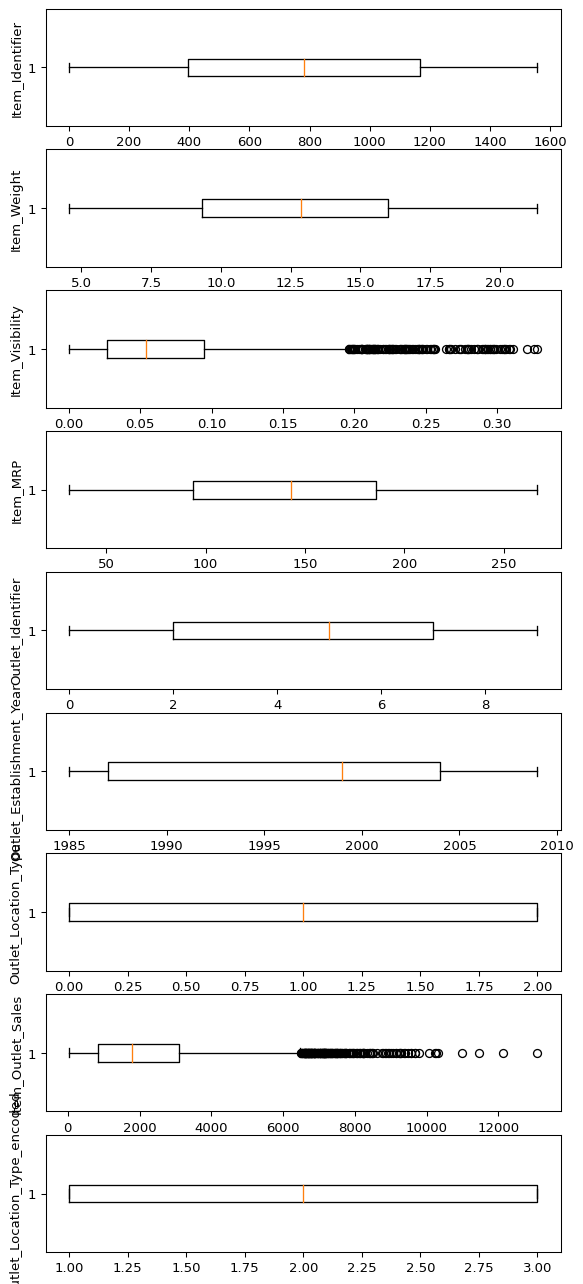

In [91]:
# let's check the outlier

# Convert non-numeric columns to numeric
for col in train_df_encoded.columns:
    if train_df_encoded[col].dtype == 'object':
        train_df_encoded[col] = train_df_encoded[col].astype('category').cat.codes

# Plot the boxplots again
fig, axs = plt.subplots(9, 1, dpi=95, figsize=(7, 17))
for i, col in enumerate(train_df_encoded.columns[0:9]):
    axs[i].boxplot(train_df_encoded[col].values, vert=False)
    axs[i].set_ylabel(col)

plt.show()


In [92]:
!pip install scipy

In [93]:
from scipy import stats

#let's drop the outlier of Item_Visibility'

# Calculate z-scores for 'Item_Visibility'
z_scores_visibility = np.abs(stats.zscore(train_df_encoded['Item_Visibility']))
# Define a z-score threshold
z_threshold = 3
# Identify rows with outliers for 'Item_Visibility'
outliers_visibility = (z_scores_visibility > z_threshold)

#let's drop the outlier of Item_Outlet_Sales

# Calculate z-scores for 'Item_Outlet_Sales'
z_scores_sales = np.abs(stats.zscore(train_df_encoded['Item_Outlet_Sales']))
# Identify rows with outliers for 'Item_Outlet_Sales'
outliers_sales = (z_scores_sales > z_threshold)
# Combine outlier flags for both variables
outliers_combined = outliers_visibility | outliers_sales
# Remove rows with outliers
train_df_cleaned = train_df_encoded[~outliers_combined]


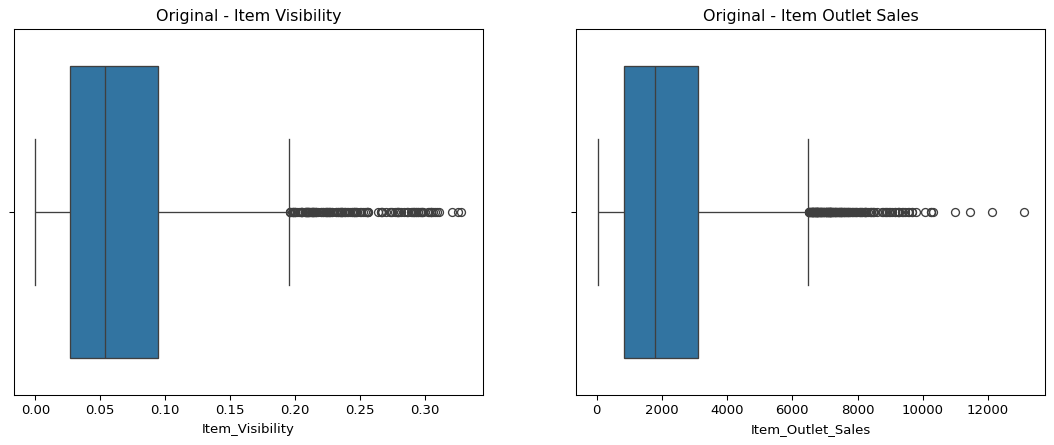

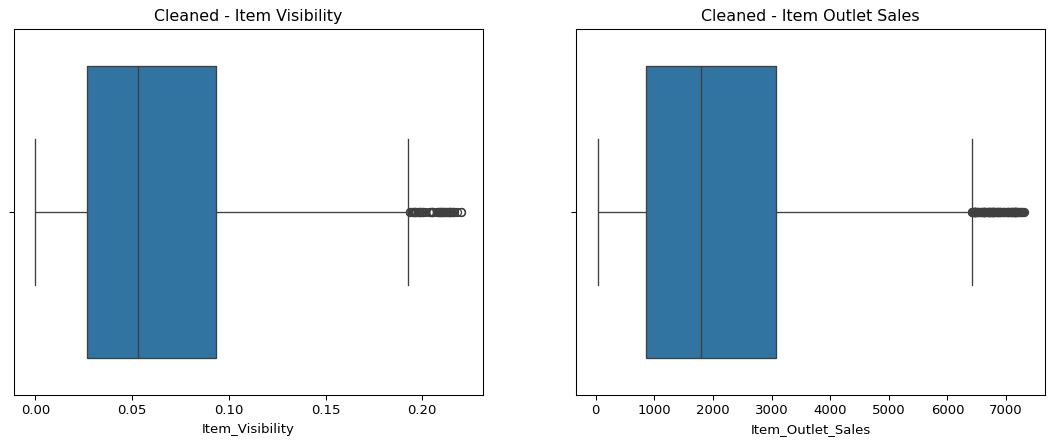

In [94]:
# Original Boxplots
fig, axs_before = plt.subplots(1, 2, dpi=95, figsize=(14, 5))

sns.boxplot(x=train_df_encoded['Item_Visibility'], ax=axs_before[0])
axs_before[0].set_title('Original - Item Visibility')

sns.boxplot(x=train_df_encoded['Item_Outlet_Sales'], ax=axs_before[1])
axs_before[1].set_title('Original - Item Outlet Sales')

plt.show()

# Boxplots after Outlier Removal
fig, axs_after = plt.subplots(1, 2, dpi=95, figsize=(14, 5))

sns.boxplot(x=train_df_cleaned['Item_Visibility'], ax=axs_after[0])
axs_after[0].set_title('Cleaned - Item Visibility')

sns.boxplot(x=train_df_cleaned['Item_Outlet_Sales'], ax=axs_after[1])
axs_after[1].set_title('Cleaned - Item Outlet Sales')

plt.show()


<ipython-input-95-8c1bd21e800b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df_encoded.corr()
<ipython-input-95-8c1bd21e800b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df_encoded.corr(), annot=True, fmt= '.2f')


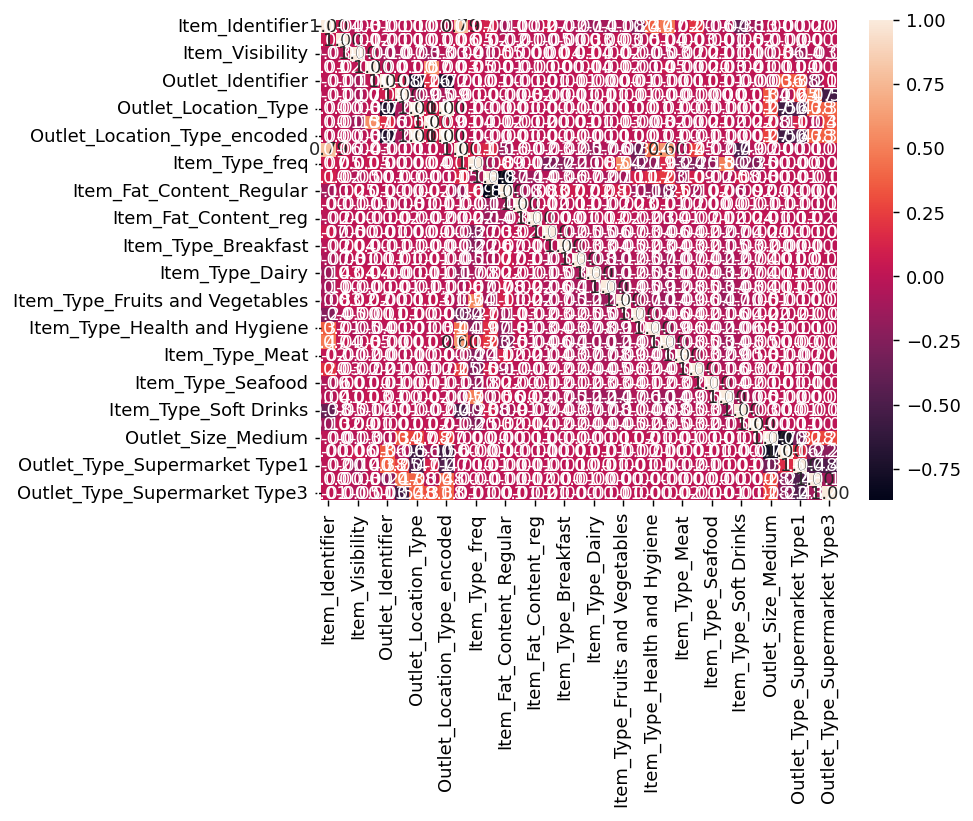

In [95]:
# Correlation
corr = train_df_encoded.corr()

plt.figure(dpi=130)
sns.heatmap(train_df_encoded.corr(), annot=True, fmt= '.2f')
plt.show()

# **9. Linear regression Modeling**

In [97]:
# Import dependencies for linear model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
#Load and Prepare Data:

#'train_df_encoded' is my preprocessed DataFrame
# Select relevant features (X) and target variable (y)
X = train_df_encoded[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Location_Type' ]]
y = train_df_encoded['Item_Outlet_Sales']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)


In [100]:
# Train the Model
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [101]:
# Make Prediction:

# Use the trained model to make predictions on the test set
y_predict = linear_model.predict(X_test)

The squared difference between the predicted and actual values is approximately Mean Squared Error: 1507004.44822631
My model explains approximately R-squared: 0.4455404543501096 of the variance in the target variable.


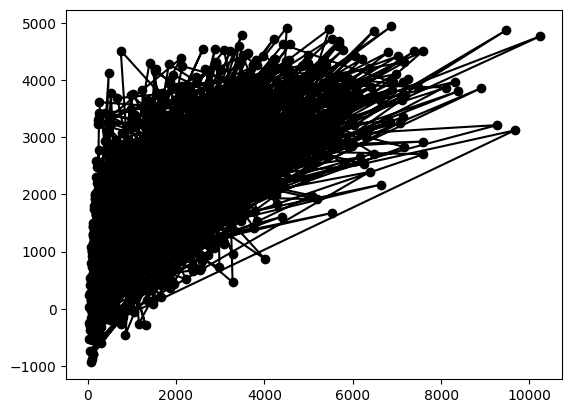

In [102]:
# Evaluate the model performance:

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
plt.plot(y_test, y_predict, color = 'Black', marker = 'o')

print('The squared difference between the predicted and actual values is approximately', f'Mean Squared Error: {mse}')
print('My model explains approximately', f'R-squared: {r2}', 'of the variance in the target variable.')


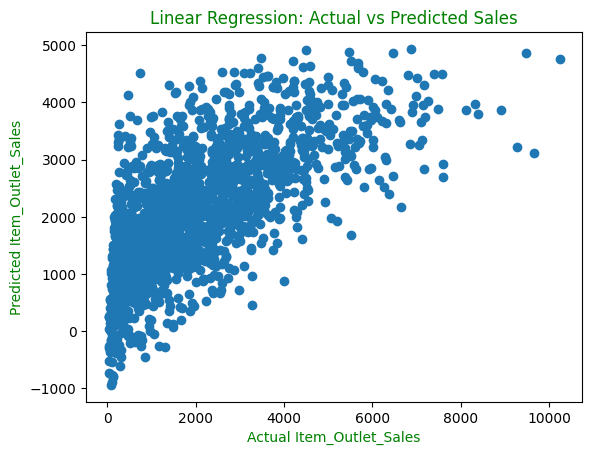

In [103]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Item_Outlet_Sales', color = 'green')
plt.ylabel('Predicted Item_Outlet_Sales', color = 'green')
plt.title('Linear Regression: Actual vs Predicted Sales', color = 'green')
plt.show()


Mean Squared Error (Lasso): 1507002.4341683593
R-squared: 0.44554119536561076


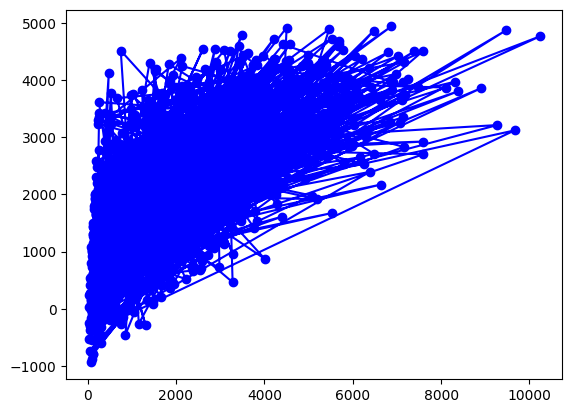

In [104]:
# Let's use Regularization on Model - Lasso (L1) Regularization

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate Lasso model
lasso_model = Lasso(alpha=0.01)

# Fit the model
lasso_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (Lasso): {mse}')
print(f'R-squared: {r2}')
plt.plot(y_test, y_pred, color = 'blue', marker = 'o')

Mean Squared Error (Ridge): 1507000.607075698
R-squared: 0.44554119536561076


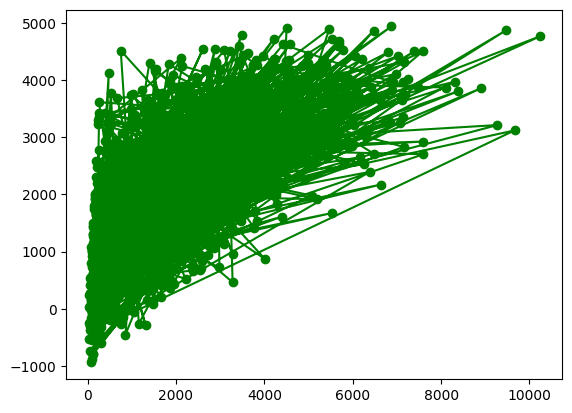

In [105]:
# Let's use Regularization on Model - Ridge (L2) Regularization

from sklearn.linear_model import Ridge

# Instantiate Ridge model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Fit the model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'R-squared: {r2}')
plt.plot(y_test, y_pred, color = 'green', marker = 'o')

# **10. Random Forest Scikit-Learn API**


In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [107]:
# Assuming X_train, X_test, y_train, y_test are your feature and target variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

Mean Squared Error (Random Forest): 1189031.914708404
R-squared: 0.5625294298444984


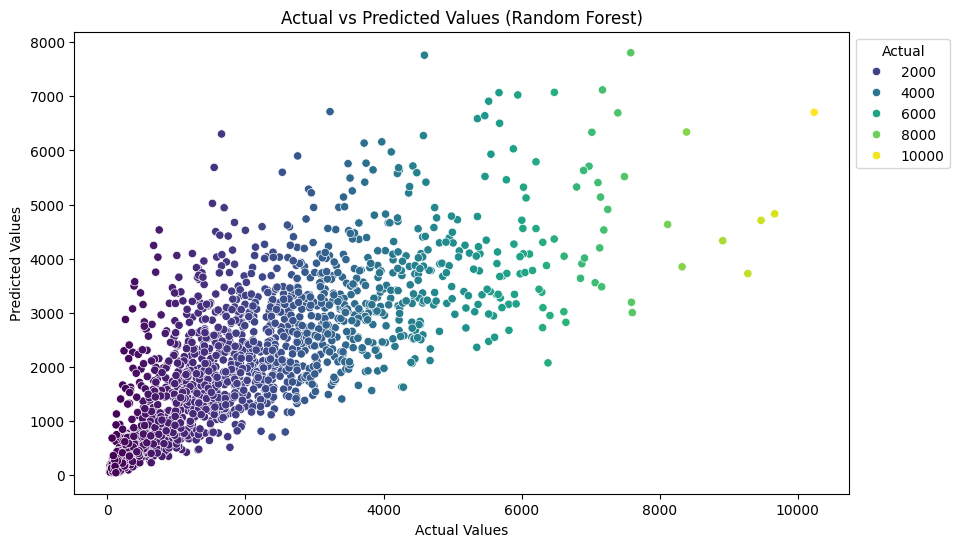

In [108]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, hue='Actual', palette='viridis')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a legend
plt.legend(title='Actual', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [109]:
#  Hyperparameter tuning on RDT

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest regressor
rf_model = RandomForestRegressor()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = RandomForestRegressor(**best_params)
final_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test_scaled)

# Evaluate the performance on the test set
test_mse = mean_squared_error(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test Mean Squared Error: {test_mse}")

# Additional evaluation metrics
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Test Mean Squared Error: 1083616.4959329427
R-squared: 0.6013140434317557


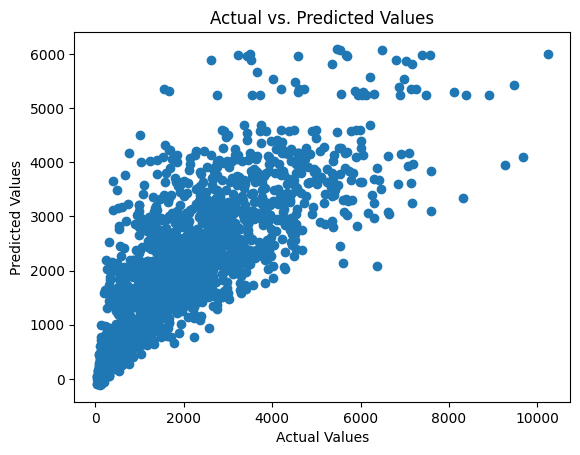

In [119]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


# **11. Using XGBoost**

In [110]:
#importing dependencies for XGBoost

import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [111]:
# X_train, X_test, y_train, y_test are your feature and target variables

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10
}

num_round = 100
model = xgb.train(params, dtrain, num_round)


In [112]:
y_pred = model.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Additional evaluation metrics
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 1069563.967889498
R-squared: 0.6064842725729975


In [113]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have a dataset X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create the XGBoost regressor
xgb_model = XGBRegressor()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = XGBRegressor(**best_params)
final_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test_scaled)

# Evaluate the performance on the test set
test_mse = mean_squared_error(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test Mean Squared Error: {test_mse}")

# Additional evaluation metrics
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Test Mean Squared Error: 1049785.3566207467
R-squared: 0.6137612516360419


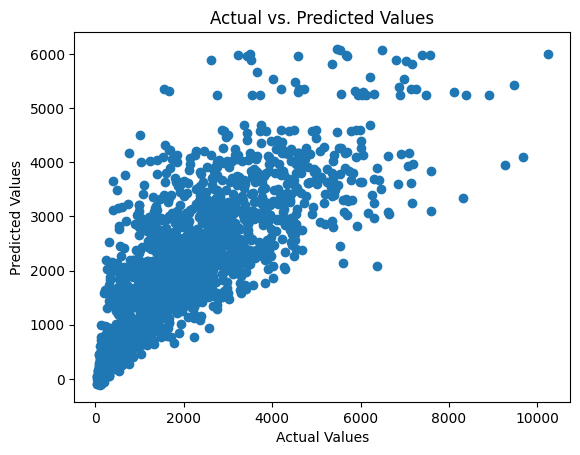

In [118]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [116]:
# Applying Standard Scaling (Z-score normalization) and Robust Scaling and check the different affects on the distribution of your data.

from sklearn.preprocessing import StandardScaler

# X is our feature matrix
scaler = StandardScaler()
X_standard_scaled = scaler.fit_transform(X)

# Displaying the original and scaled data
print("Original Data:")
print(X.head())

print("\nStandard Scaled Data:")
print(pd.DataFrame(X_standard_scaled, columns=X.columns).head())


Original Data:
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Identifier  \
0         9.30         0.016047  249.8092                  9   
1         5.92         0.019278   48.2692                  3   
2        17.50         0.016760  141.6180                  9   
3        19.20         0.000000  182.0950                  0   
4         8.93         0.000000   53.8614                  1   

   Outlet_Location_Type  
0                     0  
1                     2  
2                     0  
3                     2  
4                     2  

Standard Scaled Data:
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Identifier  \
0    -0.841872        -0.970732  1.747454           1.507813   
1    -1.641706        -0.908111 -1.489023          -0.607071   
2     1.098554        -0.956917  0.010040           1.507813   
3     1.500838        -1.281758  0.660050          -1.664513   
4    -0.929428        -1.281758 -1.399220          -1.312032   

   Outlet_Location_Type  
0         

In [117]:
# Robust Scaling
from sklearn.preprocessing import RobustScaler

# X is your feature matrix
scaler = RobustScaler()
X_robust_scaled = scaler.fit_transform(X)

# Displaying the robust scaled data
print("\nRobust Scaled Data:")
print(pd.DataFrame(X_robust_scaled, columns=X.columns).head())



Robust Scaled Data:
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Identifier  \
0    -0.531786        -0.560443  1.163142                0.8   
1    -1.037017        -0.512646 -1.031872               -0.4   
2     0.693924        -0.549899 -0.015191                0.8   
3     0.948035        -0.797844  0.425652               -1.0   
4    -0.587092        -0.797844 -0.970966               -0.8   

   Outlet_Location_Type  
0                  -0.5  
1                   0.5  
2                  -0.5  
3                   0.5  
4                   0.5  


# **Thank You!**